# Understanding Descriptive Statistics

Import the necessary libraries here:

In [1]:
# Libraries
import random
import pandas as pd
import matplotlib.pyplot as plt

## Challenge 1
#### 1.- Define a function that simulates rolling a dice 10 times. Save the information in a dataframe.
**Hint**: you can use the *choices* function from module *random* to help you with the simulation.

In [2]:
# Variables
times = 10
column = 'value'

# Define a function that simulates rolling a dice 10 times. 
def roll_the_dice(times):
    return random.choices(range(1,7), k=times)

# Store the information in a dataframe
dice_results = pd.DataFrame({column: roll_the_dice(times)})
dice_results

,value
0,6
1,1
2,4
3,6
4,1
5,5
6,1
7,5
8,5
9,2


#### 2.- Plot the results sorted by value.

In [3]:
# Sort the results by value
sorted_dice_results = dice_results.sort_values(column)
sorted_dice_results

,value
1,1
4,1
6,1
9,2
2,4
5,5
7,5
8,5
0,6
3,6


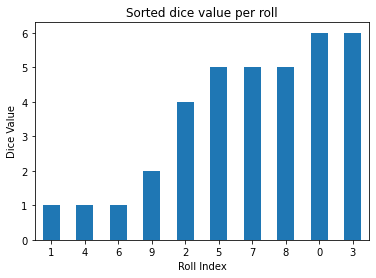

In [4]:
# Plot the sorted values.
sorted_dice_results[column].plot(kind='bar', legend=None, rot=0)
plt.xlabel('Roll Index')
plt.ylabel('Dice Value')
plt.title('Sorted dice value per roll')
plt.show()

#### 3.- Calculate the frequency distribution and plot it. What is the relation between this plot and the plot above? Describe it with words.

In [5]:
# Calculate the frequency distribution
frequency = sorted_dice_results[column].value_counts(sort=False)
frequency

1    3
2    1
4    1
5    3
6    2
Name: value, dtype: int64

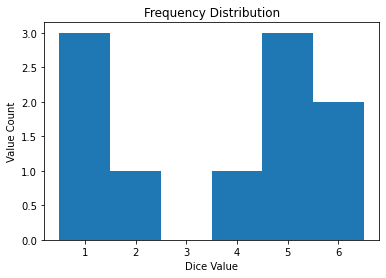

In [6]:
# Frequency distribution plot
bins = [n + 0.5 for n in range(0,7)]
dice_results.hist(bins=bins, grid=False)
plt.xlabel('Dice Value')
plt.ylabel('Value Count')
plt.title('Frequency Distribution')
plt.show()

**```Comments```**

Both plots show how many times a number has been rolled. 
The frequency distribution uses the dice values as x-axis. 
The height of the bar indicates how many times that particular value has appeared in the 10 rolls. 
However, the first plot uses the roll index sorted by dice value as x-axis. 
The height of each bar indicates the dice value for that particular roll. If we count the bars at each height,
we get the number of times that a dice value has appeared in the 10 rolls. 

## Challenge 2
Now, using the dice results obtained in *challenge 1*, you are going to define some functions that will help you calculate the mean of your data in two different ways, the median and the four quartiles. 

#### 1.- Define a function that computes the mean by summing all the observations and dividing by the total number of observations. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [7]:
def mean_calculation_method_one(df, column):
    return float(df[column].sum() / len(df[column]))

# Test
print(f"- Computed mean: {mean_calculation_method_one(dice_results, column)}")
print(f"- True mean: {dice_results.mean()[column]}")

- Computed mean: 3.6
- True mean: 3.6


#### 2.- First, calculate the frequency distribution. Then, calculate the mean using the values of the frequency distribution you've just computed. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [8]:
def mean_calculation_method_two(df, column):
    values_df = df[column].value_counts()
    frequency = values_df.values
    dice_value = values_df.index
    return float(sum(dice_value * frequency) / len(df[column]))

# Test
print(f"- Computed mean: {mean_calculation_method_two(dice_results, column)}")
print(f"- True mean: {dice_results.mean()[column]}")

- Computed mean: 3.6
- True mean: 3.6


#### 3.- Define a function to calculate the median. You are not allowed to use any methods or functions that directly calculate the median value. 
**Hint**: you might need to define two computation cases depending on the number of observations used to calculate the median.

In [9]:
def median_calculation(df, column):
    df = df.sort_values(column)
    df = df.reset_index(drop=True)
    n_elem = len(df[column])
    index = n_elem // 2
    if not n_elem % 2:
        first_element = df[column][index - 1]
        second_element = df[column][index]
        return float((first_element + second_element) / 2)
    return float(df[column][index])

# Test
print(f"- Computed median: {median_calculation(dice_results, column)}")
print(f"- True median: {dice_results.median()[column]}")

- Computed median: 4.5
- True median: 4.5


#### 4.- Define a function to calculate the four quartiles. You can use the function you defined above to compute the median but you are not allowed to use any methods or functions that directly calculate the quartiles. 

In [10]:
# There are many ways to compute the quartiles: https://en.wikipedia.org/wiki/Quartile
# We are creating a function in which you can decide which of the 3 methods defined in Wikipedia to use.

def quartiles_calculation(df, column, method):
    Q2 = median_calculation(df, column)
    Q4 = float(max(df[column]))
    n_elem = len(df[column])
    index = n_elem // 2
    if not n_elem % 2:
        lower_df = df.iloc[0:index]
        upper_df = df.iloc[index:]
    else:
        if method == 1:
            lower_df = df.iloc[0:index]
            upper_df = df.iloc[index+1:]
        elif method == 2:
            lower_df = df.iloc[0:index+1]
            upper_df = df.iloc[index:]
        elif method == 3:
            Q1, Q3 = method_three_odd_data(df, column, n_elem)
            return Q1, Q2, Q3, Q4
    Q1 = median_calculation(lower_df, column)
    Q3 = median_calculation(upper_df, column)
    return Q1, Q2, Q3, Q4

def method_three_odd_data(df, column, n_elem):
    n_case_1 = (n_elem - 1) / 4
    if not n_case_1 % 1:
        n_case_1 = int(n_case_1)
        Q1 = (0.25 * df.iloc[n_case_1-1] + 0.75 * df.iloc[n_case_1])[column]
        Q3 = (0.25 * df.iloc[3*n_case_1+1] + 0.75 * df.iloc[3*n_case_1])[column]
    else:
        n_case_2 = int((n_elem - 3) / 4)
        Q1 = (0.25 * df.iloc[n_case_2+1] + 0.75 * df.iloc[n_case_2])[column]
        Q3 = (0.25 * df.iloc[3*n_case_2+1] + 0.75 * df.iloc[3*n_case_2+2])[column]
    return Q1, Q3

In [11]:
# Comparison between our calculations and pandas results using the quantile method 
# and different types of interpolation

results = {}
our_methods = ['method 1', 'method 2', 'method 3']
pandas_methods = ['nearest', 'midpoint']

for index, method in enumerate(our_methods):
    results[method] = quartiles_calculation(sorted_dice_results, column, index + 1)

for method in pandas_methods:
    results[method] = sorted_dice_results.quantile([0.25, 0.5, 0.75, 1], interpolation=method)[column].astype('float')

results_df = pd.DataFrame(results)
results_df.index = ['Q1', 'Q2', 'Q3', 'Q4']
results_df

,method 1,method 2,method 3,nearest,midpoint
Q1,1.0,1.0,1.0,1.0,1.5
Q2,4.5,4.5,4.5,4.0,4.5
Q3,5.0,5.0,5.0,5.0,5.0
Q4,6.0,6.0,6.0,6.0,6.0


## Challenge 3
Read the csv `roll_the_dice_hundred.csv` from the `data` folder.
#### 1.- Sort the values and plot them. What do you see?

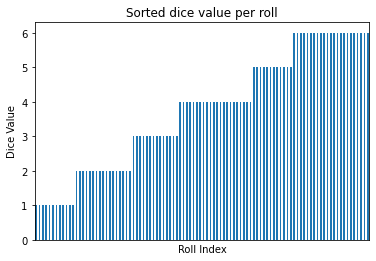

In [12]:
# Read the csv
roll_the_dice_hundred = pd.read_csv('../data/roll_the_dice_hundred.csv', usecols=[1,2], index_col=0)

# Sort the values
sorted_roll_the_dice_hundred = roll_the_dice_hundred.sort_values(column)

# Plot the sorted values
sorted_roll_the_dice_hundred[column].plot(kind='bar', legend=None, rot=0)
plt.xticks([])
plt.xlabel('Roll Index')
plt.ylabel('Dice Value')
plt.title('Sorted dice value per roll')
plt.show()

**```Comments```**

We can see if a number was rolled more times than another one.

#### 2.- Using the functions you defined in *challenge 2*, calculate the mean value of the hundred dice rolls.

In [13]:
df = roll_the_dice_hundred
print(f"Mean Method 1: {mean_calculation_method_one(df, column)}")
print(f"Mean Method 2: {mean_calculation_method_two(df, column)}")

Mean Method 1: 3.74
Mean Method 2: 3.74


#### 3.- Now, calculate the frequency distribution.


In [14]:
# Calculate the frequency distribution
frequency = roll_the_dice_hundred[column].value_counts(sort=False)
frequency

1    12
2    17
3    14
4    22
5    12
6    23
Name: value, dtype: int64

#### 4.- Plot the histogram. What do you see (shape, values...) ? How can you connect the mean value to the histogram? 

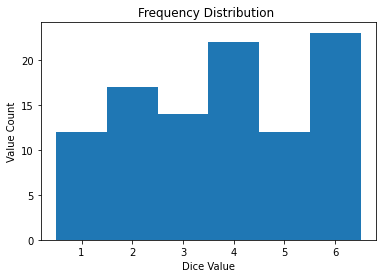

In [15]:
# Frequency distribution plot
bins = [n + 0.5 for n in range(0,7)]
roll_the_dice_hundred[column].hist(bins=bins, grid=False)
plt.xlabel('Dice Value')
plt.ylabel('Value Count')
plt.title('Frequency Distribution ')
plt.show()

**```Comments```**

We know that the probability of rolling each number is the same (1/6), so the frequency of each value should be similar (unless the dice is rigged). We expect to see a uniform frequency distribution as the number of observations in our sample increases. The population mean value of a discrete uniform distribution is:

$\mu = \frac{a+b}{2}$

In our case, this value is:

$\mu = \frac{a+b}{2} = \frac{1+6}{2} = 3.5$

However, we can see that the distribution of our sample is not uniform at all. The most repeated dice values in the sample are 4 and 6. For that reason, we expect the sample mean value to be higher than the theoretical one and in fact, it is:

$3.74 \gt 3.5$  

#### 5.- Read the `roll_the_dice_thousand.csv` from the `data` folder. Plot the frequency distribution as you did before. Has anything changed? Why do you think it changed?

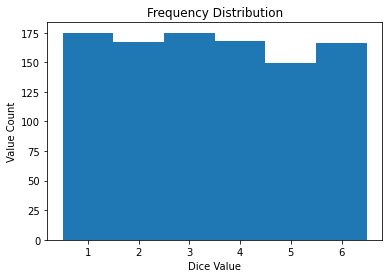

In [16]:
# Read the csv.
roll_the_dice_thousand = pd.read_csv('../data/roll_the_dice_thousand.csv', usecols=[1,2], index_col=0)

# Calculate the frequency distribution
bins = [n + 0.5 for n in range(0,7)]
roll_the_dice_thousand[column].hist(bins=bins, grid=False)
plt.xlabel('Dice Value')
plt.ylabel('Value Count')
plt.title('Frequency Distribution')
plt.show()

**```Comments```**

As commented above, we expect the population to have a discrete uniform distribution. The sample we used before had ten times less observations than the one we are using now. The bigger the sample is, the better it will approximate the behaviour of the population. For that reason, the last plot looks a lot more like the distribution we expect to see. 

If we compute the mean value using the present sample, it will surely be a more accurate estimation of the population mean. Let's check:

In [17]:
df = roll_the_dice_thousand
print(f"Mean Method 1: {mean_calculation_method_one(df, column)}")
print(f"Mean Method 2: {mean_calculation_method_two(df, column)}")

Mean Method 1: 3.447
Mean Method 2: 3.447


## Challenge 4
In the `data` folder of this repository you will find three different files with the prefix `ages_population`. These files contain information about a poll answered by a thousand people regarding their age. Each file corresponds to the poll answers in different neighbourhoods of Barcelona.

#### 1.- Read the file `ages_population.csv`. Calculate the frequency distribution and plot it as we did during the lesson. Try to guess the range in which the mean and the standard deviation will be by looking at the plot. 

In [18]:
# Read the csv
ages_population = pd.read_csv('../data/ages_population.csv')

In [19]:
# Calculate the frequency distribution
column = 'observation'
frequency = ages_population[column].value_counts()
frequency

39.0    45
41.0    36
30.0    34
35.0    33
43.0    32
        ..
70.0     1
71.0     1
7.0      1
69.0     1
73.0     1
Name: observation, Length: 72, dtype: int64

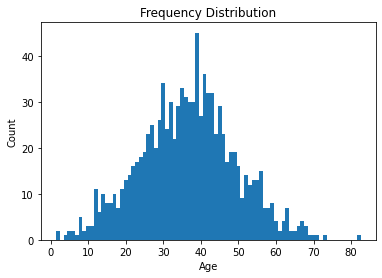

In [20]:
# Frequency distribution plot
max_range = int(ages_population[column].max()) + 1
min_range = int(ages_population[column].min())
bins = [n + 0.5 for n in range(min_range, max_range)]
ages_population[column].hist(bins=bins, grid=False)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Frequency Distribution')
plt.show()

**`Comments`**

As the distribution looks normal, the mean should be around $35\pm5$ years and the standard deviation should be around $10\pm5$ years.

#### 2.- Calculate the exact mean and standard deviation and compare them with your guesses. Do they fall inside the ranges you guessed?

In [21]:
ages_population[column].describe()

count    1000.0000
mean       36.5600
std        12.8165
min         1.0000
25%        28.0000
50%        37.0000
75%        45.0000
max        82.0000
Name: observation, dtype: float64

**`Comments`**

Yes, the exact results are inside the expected range.

#### 3.- Now read the file `ages_population2.csv` . Calculate the frequency distribution and plot it.

In [22]:
# Read the csv
ages_population_2 = pd.read_csv('../data/ages_population2.csv')

In [23]:
# Calculate the frequency distribution
frequency = ages_population_2[column].value_counts()
frequency

28.0    139
27.0    125
26.0    120
29.0    115
25.0     98
30.0     90
24.0     78
31.0     61
23.0     41
22.0     35
32.0     31
33.0     22
21.0     17
20.0     13
34.0      7
35.0      3
19.0      3
36.0      2
Name: observation, dtype: int64

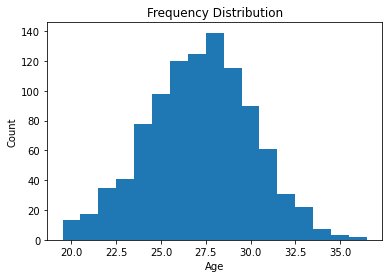

In [24]:
# Frequency distribution plot
max_range = int(ages_population_2[column].max()) + 1
min_range = int(ages_population_2[column].min())
bins = [n + 0.5 for n in range(min_range, max_range)]
ages_population_2[column].hist(bins=bins, grid=False)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Frequency Distribution')
plt.show()

####  4.- What do you see? Is there any difference with the frequency distribution in step 1?

**`Comments`**

This distribution looks normal. It seems that this particular neighbourhood is populated by young people, as we can see that the age range does not include children, teenagers and people older than 40 years old.   

This time the mean value should be around $27\pm 2.5$ years and the standard deviation around $2\pm1$ years.

As opposed to the present distribution, the distribution in step 1 includes a wider range of ages with observations that include from babies to old people. So now we expect to observe a lower mean in the present distribution, as it only includes young people, and a lower standard deviation, as the age range is narrower.

#### 5.- Calculate the mean and standard deviation. Compare the results with the mean and standard deviation in step 2. What do you think?

In [25]:
ages_population_2[column].describe()

count    1000.000000
mean       27.155000
std         2.969814
min        19.000000
25%        25.000000
50%        27.000000
75%        29.000000
max        36.000000
Name: observation, dtype: float64

**`Comments`**

As commented above, we expect to observe a lower mean and standard deviation in the present distribution than in step 2, as now we only have observations of young people and the age range is narrower.

The exact results are inside the expected range.

## Challenge 5
Now is the turn of `ages_population3.csv`.

#### 1.- Read the file `ages_population3.csv`. Calculate the frequency distribution and plot it.

In [26]:
# Read the csv
ages_population_3 = pd.read_csv('../data/ages_population3.csv')

In [27]:
# Calculate the frequency distribution
frequency = ages_population_3[column].value_counts()
frequency

32.0    37
35.0    31
37.0    31
39.0    29
36.0    26
        ..
76.0     1
9.0      1
1.0      1
5.0      1
7.0      1
Name: observation, Length: 75, dtype: int64

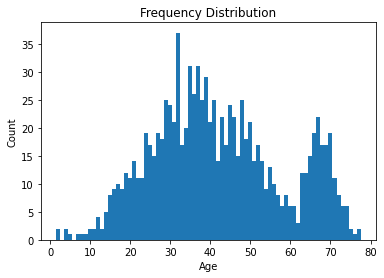

In [28]:
# Frequency distribution plot
max_range = int(ages_population_3[column].max()) + 1
min_range = int(ages_population_3[column].min())
bins = [n + 0.5 for n in range(min_range, max_range)]
ages_population_3[column].hist(bins=bins, grid=False)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Frequency Distribution')
plt.show()

#### 2.- Calculate the mean and standard deviation. Compare the results with the plot in step 1. What is happening?

In [29]:
ages_population_3[column].describe()

count    1000.000000
mean       41.989000
std        16.144706
min         1.000000
25%        30.000000
50%        40.000000
75%        53.000000
max        77.000000
Name: observation, dtype: float64

**`Comments`**

The frequency distribution looks like a bimodal normal distribution, which means that it is the sum of two normal distributions, in this case, with different means and standard deviations.  

The first normal is approximately centered at 37 and the second one at 68. In addition, the first normal has a wider age range than the second one, so it has a greater standard deviation. 

When computing the mean and standard deviation of the bimodal distribution, the first normal will have more weight on the calculations as it is formed by more observations than the second normal. Then, we expect the mean and standard deviation of the bimodal distribution to be similar or close to the mean and standard deviation of the first normal. 

However, the second normal will increase the expected mean and standard deviation values. Why? 

Because the observations of the second normal all belong to a narrower range of higher age values. For that reason, the bimodal distribution will have a higher mean value (41.98) than the first normal mean (37). 
Regarding the standard deviation, it measures how close the observations are to the mean (dispersion). The values of the second normal are all far from the bimodal mean value, which will make the dispersion of data higher. 

#### 3.- Calculate the four quartiles. Use the results to explain your reasoning for question in step 2. How much of a difference is there between the median and the mean?

In [30]:
ages_population_3[column].describe()

count    1000.000000
mean       41.989000
std        16.144706
min         1.000000
25%        30.000000
50%        40.000000
75%        53.000000
max        77.000000
Name: observation, dtype: float64

**`Comments`**

If we take a look at the quartiles, we can see that 75% of the observations have a value lower or equal to 53, which means they are part of the first normal. So the second normal is formed by less than the 25% of the total samples.

Then we can confirm that the first normal will have more weight in the calculation of the mean and standard deviation of the bimodal distribution.

The mean (41.98) and the median (40) have a difference of almost two years. The main reason is that the median is a much more robust metric than the mean, which means that it is less affected by extreme values. The value of the median is lower because it is not as affected by the second normal higher age values as the mean. 

#### 4.- Calculate other percentiles that might be useful to give more arguments to your reasoning.

In [31]:
ages_population_3['observation'].quantile(0.85)

64.0

**`Comments`**

If we check the 85% percentile, we can see that 15% of the observations are greater or equal than 64, which is approximately the limit between both normals. So we can say that the first normal is formed by approximately 85% of the observations while the second is formed by 15% of the observations.

To test that these are the weights that measure how much each normal contributes to the bimodal mean and standard deviation calculation, we can try to compute an approximation of the bimodal mean using the weighted approximate means of both normals.

$\hat{\mu} = 0.85*\hat{\mu}_1 + .15*\hat{\mu}_2 = 0.85*37 + 0.15*68 = 41.65 \cong 41.98 = \mu$

We get similar values so we can say that we have found good contribution percentages. 

## Bonus challenge
Compare the information about the three neighbourhoods. Prepare a report about the three of them. Remember to find out which are their similarities and their differences backing your arguments in basic statistics.

In [32]:
sumamry_df = pd.concat([ages_population[column], 
                        ages_population_2[column], 
                        ages_population_3[column]], 
                        axis=1, keys=['population 1', 'population_2', 'population_3'])
sumamry_df.describe()

,population 1,population_2,population_3
count,1000.0000,1000.000000,1000.000000
mean,36.5600,27.155000,41.989000
std,12.8165,2.969814,16.144706
min,1.0000,19.000000,1.000000
25%,28.0000,25.000000,30.000000
50%,37.0000,27.000000,40.000000
75%,45.0000,29.000000,53.000000
max,82.0000,36.000000,77.000000


**`Comments`**

Neighbourhood 2 has the youngest population. The mean is 27 years old and the low standard deviation tells us that people in that area has an age that won't differ much from 27 years old. In fact, if we take a look at the quartiles, we can see that 50% of the observations are people of ages between 25 and 29. 

Neighbourhood 1 and 3 are really different from neighbourhood 2 but really similar between them. The mean age is higher than in neighbourhood 2, so the population is older. The standard deviation is also higher, so people's ages in those neighborhoods are more spread and far from the mean value. If we take a look at the maximum and minimum values we can confirm that the age range goes from childhood to old age, as opposed to neighbourhood 2.  